## Práctico 3 

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Cargar y normalizar el conjunto de datos 

# La división de las imágenes por 255 es una técnica de preprocesamiento de datos conocida como normalización.
# Las imágenes estan compuestas por píxeles, y cada píxel tiene un valor de intensidad en la escala de grises (para imágenes en blanco y negro) o en los canales de color rojo, verde y azul. 
# Estos valores de intensidad varían de 0 a 255, donde 0 representa el negro puro y 255 el blanco puro.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas en one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

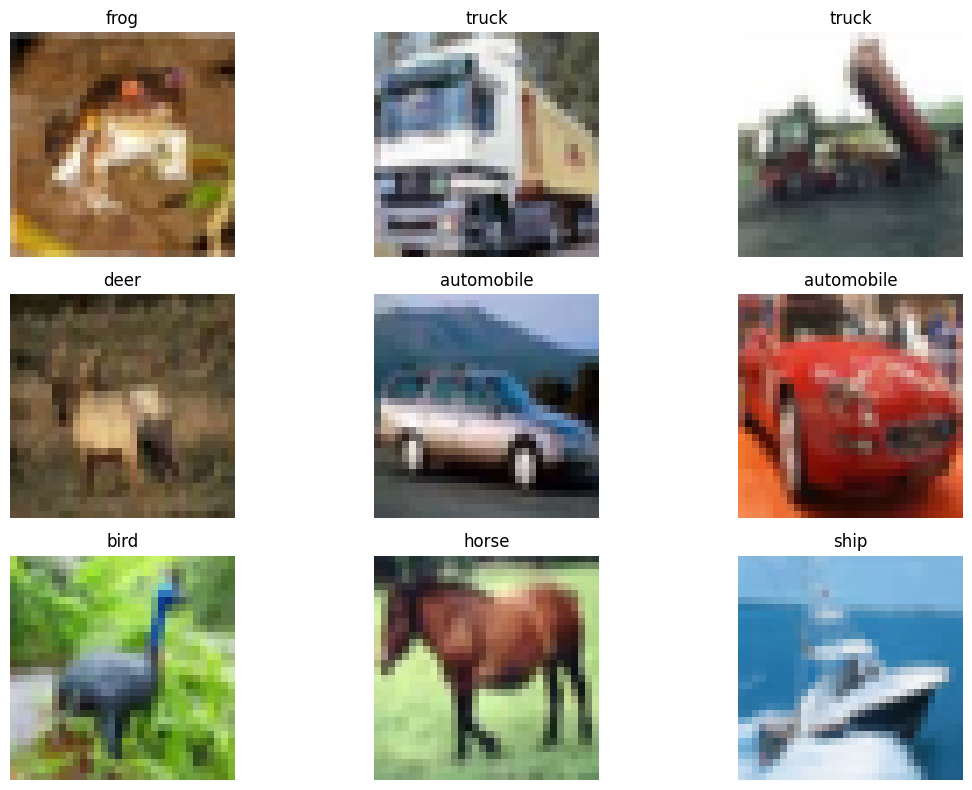

In [13]:
# Función para visualizar imágenes de muestra y sus etiquetas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(x, y):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(np.clip(x[i], 0, 1))
        plt.title(class_names[np.argmax(y[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar imágenes de muestra y sus etiquetas
plot_sample_images(x_train, y_train)

# Crea los generadores de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train)

In [14]:
# Define tu modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compila y entrena el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-05-21 14:44:27.501224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


391/391 [==============================] - 95s 238ms/step - loss: 1.8135 - accuracy: 0.3774 - val_loss: 2.9378 - val_accuracy: 0.1259
Epoch 2/10
391/391 [==============================] - 93s 239ms/step - loss: 1.3793 - accuracy: 0.5076 - val_loss: 1.1935 - val_accuracy: 0.5957
Epoch 3/10
391/391 [==============================] - 93s 238ms/step - loss: 1.2196 - accuracy: 0.5670 - val_loss: 1.2011 - val_accuracy: 0.5910
Epoch 4/10
391/391 [==============================] - 95s 242ms/step - loss: 1.1339 - accuracy: 0.6037 - val_loss: 1.0556 - val_accuracy: 0.6387
Epoch 5/10
391/391 [==============================] - 96s 246ms/step - loss: 1.0647 - accuracy: 0.6268 - val_loss: 1.2094 - val_accuracy: 0.6184
Epoch 6/10
391/391 [==============================] - 94s 240ms/step - loss: 1.0194 - accuracy: 0.6480 - val_loss: 0.9327 - val_accuracy: 0.6864
Epoch 7/10
391/391 [==============================] - 93s 238ms/step - loss: 0.9710 - accuracy: 0.6632 - val_loss: 1.1576 - val_accuracy: 0.6

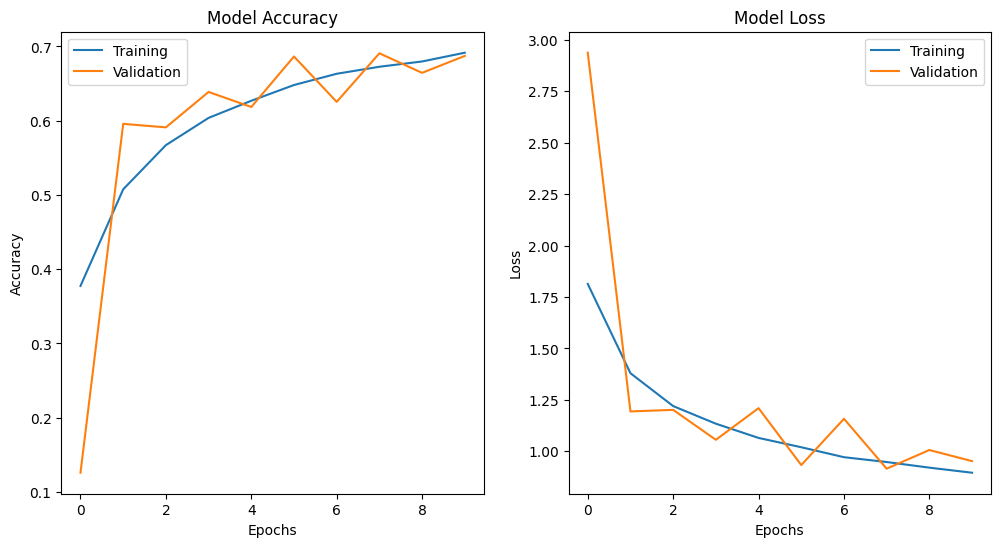

In [15]:
def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
plot_history(history)

# Save the trained model
model.save('conv.h5')